<a href="https://colab.research.google.com/github/technisekai/orbit-future-academy-km/blob/main/Week_3_Quiz_1_Widi_Afandi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUIZ 1 WEEK 3**

Nama : Widi Afandi

Institusi: Institut Teknologi Telkom Purwokerto

# **1. Mempersiapkan Dataset**

Dalam step ini dilakukan import library yang dibutuhkan serta memuat dataset yang akan digunakan 

***- Penjelasan Cell 1:***

Mengimpor berbagai library yang dibutuhkan untuk melakukan preprocessing dataset, menghitung matrix model, dan visualisasi



In [6]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# matrix
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

***- Penjelasan Cell 2:***

Upload dataset titanic dengan pilih file datasetnya

In [7]:
# Upload file dataset
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


***- Penjelasan Cell 3:***

Impor dataset dan menampilkan 5 data secara acak

In [8]:
# Importing dataset
data = pd.read_csv("Titanic.csv")

# Show dataset
data.sample(5)

,Name,PClass,Age,Sex,Survived
700,"Calic, Mr Peter",3rd,17.0,male,0
411,"Gale, Mr Shadrach",2nd,38.0,male,0
1292,"Wiklund, Mr Jacob Alfred",3rd,18.0,male,0
576,"Ware, Mr William J",2nd,23.0,male,0
718,"Christmann, Mr Emil",3rd,29.0,male,0


# **2. Data Cleansing**

Proses ini meliputi mengubah nilai kolom Sex menjadi numeric, menghilangkan nilai NaN, dan memproses nilai pada PClass ke numeric pada kolom Age

***- Penjelasan Cell 4:***

Preprocessing dataset dengan mengubah nilai pada kolom Sex ke numerik, menghilangkan nilai NaN pada dataset, dan mengubah nilai pada kolom PClass ke numerik

In [9]:
# Convert categorical variable to numeric
data["Sex_cleaned"] = np.where(data["Sex"] == "male",0,1)

# Cleaning dataset of NaN
data=data[[
    "Survived",
    "PClass",
    "Sex_cleaned",
    "Age"
]].dropna(axis=0, how='any')

# Replace 1st, 2nd, 3rd to integer
data["PClass"] = data["PClass"].replace(['1st', '2nd', '3rd'], [1, 2, 3])

***- Penjelasan Cell 5:***

Menampilkan 5 data secara acak dari dataset setelah proses cleansing

In [10]:
# Show data after cleansing process
data.sample(5)

,Survived,PClass,Sex_cleaned,Age
426,0,2,0,44.0
451,1,2,0,41.0
427,0,2,0,28.0
163,1,1,1,50.0
909,0,3,0,21.0


***- Penjelasan Cell 6:***

Memilih feature/kolom pada dataset yang akan digunakan untuk proses training.Digunakan 3 fitur yaitu PClass, Sex_cleaned, Age

In [17]:
# Select features
used_features =[
    "PClass",
    "Sex_cleaned",
    "Age"
]

***- Penjelasan Cell 7:***

Memisahkan label dan fitur pada dataset dengan variable y dan X dimana X menyimpan nilai dari fitur/kolom yang didefinisiakan di variable used_features dan y menyimpan nilai dari kolom "Survived"

In [18]:
# Features
X = data[used_features].values
# Labels
y = data["Survived"]

***- Penjelasan Cell 8:***

Memisahkan variabel X dan y menjadi dua yaitu data training untuk proses pelatihan dan data testing untuk menguji hasil pelatihan

In [28]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# **3. Modeling**

Digunakan model dari sklearn yaitu naive bayes dimana ada 3 model yang akan digunakan yaitu GaussianNB, BernoulliNB, dan MultinomialNB

***- Penjelasan Cell 9:***

Mendefinisikan model yang akan digunakan, disini terdapat 3 model yaitu GaussianNB, BernoulliNB, dan MultinomialNB serta mendefinisikan matrix dan dataframe untuk menyimpan hasil matrix evaluasi

In [29]:
# Define model
nb =  {
    'Gaussian NB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'MultinomialNB': MultinomialNB()
}
# Define matrix
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]
log = pd.DataFrame(columns=log_cols)

***- Penjelasan Cell 10:***

Proses training dengan data training dan evaluasi hasil training dengan data testing dengan menggunakan beberapa matrix

In [30]:
# Training model with train dataset and test it with test dataset
for name, model in nb.items():
  # Train model
  cls = model
  cls = cls.fit(X_train, y_train)
  # Predict model to X_test
  y_out = cls.predict(X_test)
  # Matrix
  accuracy = m.accuracy_score(y_test,y_out)
  precision = m.precision_score(y_test,y_out,average='macro')
  recall = m.recall_score(y_test,y_out,average='macro')
  roc_auc = roc_auc_score(y_out,y_test)
  f1_score = m.f1_score(y_test,y_out,average='macro')
  # Append result matrix to dataframe
  log_entry = pd.DataFrame([[name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
  log = log.append(log_entry)

***- Penjelasan Cell 11:***

Visualisasi hasil training dan evaluasi dalam bentuk grafik 

      Classifier  Accuracy  Precision Score  Recall Score  F1-Score  \
0    Gaussian NB  0.809211         0.808046      0.804972  0.806182   
0    BernoulliNB  0.822368         0.822811      0.816877  0.818912   
0  MultinomialNB  0.822368         0.822811      0.816877  0.818912   

   roc-auc_Score  
0       0.808046  
0       0.822811  
0       0.822811  


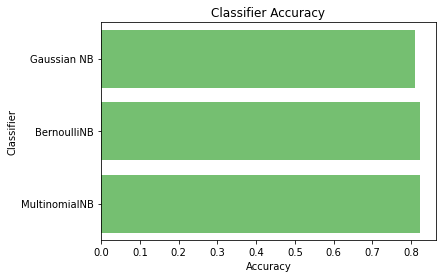

In [31]:
# Result
print(log)
history = pd.DataFrame(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()

# **4. Kesimpulan**

Dari 3 model yang dicoba yaitu GaussianNB, BernoulliNB, dan MultinomialNB didapatkan hasil akurasi yang paling baik pada dataset Titanic adalah model BernoulliNB dan MultinomialNB dengan akurasi 82%